In [13]:
import pandas as pd
from math import sin, cos, sqrt, degrees, radians, asin, acos
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


x = open("Stop_to_Sculpture.gpx", "r")

lat = []
long = []
ele = []

for a in range (0, 10000):
    if x.read(1) == ' ' and x.read(1) == 'l':
        x.read(4)
        lat.append(float(x.read(9)))
        x.read(7)
        long.append(float(x.read(11)))
        x.read(16)
        ele.append(float(x.read(5)))

In [14]:
#earth radius (mi)
r = 3958.8

distance = []

#inverse haversine
for a in range (0, len(lat) - 1):
    lat1 = radians(lat[a])
    lat2 = radians(lat[a+1])
    long1 = radians(long[a])
    long2 = radians(long[a+1])
    urad1 = sin((lat2-lat1)/2)**2
    urad2 = cos(lat1) * cos(lat2) * sin((long2-long1)/2)**2
    dis = 2 * r * asin(sqrt(urad1 + urad2))    
    if a == 0:
        distance.append(dis)
    else:
        distance.append(dis + distance[a-1])

In [15]:
elevation = []
for a in range (0, len(ele) - 1):
    elevation.append((ele[a] + ele[a+1]) / 2)

g = input("reverse? y/n: ")
if g == 'y':
    temp = []
    print('reversed')
    for a in range (0, len(elevation)):
        temp.append(elevation[len(elevation) - 1 - a])
    elevation = temp

reverse? y/n: y
reversed


In [16]:
db = pd.DataFrame(list(zip(distance, elevation)), columns=['distance', 'elevation'])
db

,distance,elevation
0,0.004939,141.9
1,0.013480,140.5
2,0.017039,141.0
3,0.022818,141.0
4,0.028555,141.4
...,...,...
86,0.596404,131.0
87,0.599238,132.6
88,0.609364,132.8
89,0.617742,128.0


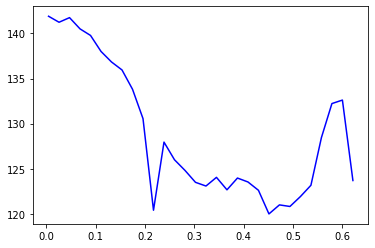

In [17]:
#dist = distance.reshape(-1,)
#elv = elevation.values

from scipy.interpolate import make_interp_spline, BSpline
phi = np.linspace(0, 2.*np.pi, 40)
xnew = np.linspace(min(distance), max(distance), 30) #30 represents number of points to make between T.min and T.max
spl = make_interp_spline(distance, elevation, k=1) #BSpline object
altitude_feet = spl(xnew)
altitude_mi = spl(xnew) / 5280

#plot
plt.plot(xnew, altitude_feet, 'b-')
plt.show()

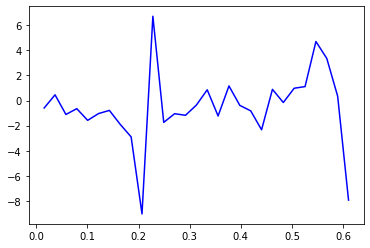

In [18]:
grad = []
grad_at = []
grad_dist = []
for a in range (0, 29):
    dx = xnew[a + 1] - xnew[a]
    dy = altitude_mi[a + 1] - altitude_mi[a]
    grad.append((dy / dx) * 100)
    temp = (xnew[a + 1] + xnew[a]) / 2
    grad_at.append(temp)
    grad_dist.append(dx)
plt.plot(grad_at, grad, 'b-')
plt.show()